# Classification model using Random Forest

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


### 2. Upload Clinic data

In [2]:
path ="../../../../Data_preprocessing/RNA_post_autoencoder/encoded_data_multiclass_43.csv"
data = pd.read_csv(path)
data.reset_index
data.round(4)
data=data.iloc[:,1:440  ] 
data.head()

,Target,0,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,41,42
0,2,0.022976,-0.965310,-1.238710,-0.980600,-1.223086,-0.737987,-0.887323,-0.675689,-0.028122,...,0.269411,-0.928447,-0.028176,0.111155,-0.279341,0.982918,-0.837571,-0.242425,-0.231228,0.046297
1,1,-0.151407,-0.861814,-0.970073,-0.646467,0.316065,0.509519,-0.708765,-0.422852,-0.436029,...,-0.513224,0.174376,0.292357,1.021724,1.833745,1.062946,0.196452,0.012724,-0.118445,0.739934
2,2,-0.068210,-1.288656,-1.196822,-0.350951,-0.518477,0.425649,-0.675744,0.307187,-0.279795,...,-0.291583,-0.543025,0.626299,0.957170,0.787820,0.170295,0.837617,-0.622304,-0.296431,-0.324272
3,0,-0.392235,-0.980445,-0.998436,-0.137651,0.285102,0.807072,-0.229599,0.203830,-0.296264,...,-0.536840,0.085051,0.212710,0.409950,1.947804,1.063359,-0.320035,-0.099703,-0.466355,0.805688
4,1,0.263224,0.673038,-1.974711,1.167531,-1.717946,1.500515,-1.023599,-0.077397,-0.726597,...,-0.237098,-0.970870,-1.468881,0.098396,1.068838,-0.387483,-0.999648,0.460180,-1.353426,-0.283846


In [3]:
Y = data.Target # Target column

X = data.iloc[:,1:439] # I selected all the columns by removing the Unnamed column (row id) and the Target column.


print(X)
print('Numero de pacientes: ',len(Y))

            0         1         2         3         4         5         6  \
0    0.022976 -0.965310 -1.238710 -0.980600 -1.223086 -0.737987 -0.887323   
1   -0.151407 -0.861814 -0.970073 -0.646467  0.316065  0.509519 -0.708765   
2   -0.068210 -1.288656 -1.196822 -0.350951 -0.518477  0.425649 -0.675744   
3   -0.392235 -0.980445 -0.998436 -0.137651  0.285102  0.807072 -0.229599   
4    0.263224  0.673038 -1.974711  1.167531 -1.717946  1.500515 -1.023599   
..        ...       ...       ...       ...       ...       ...       ...   
176 -0.152809 -0.701253 -1.527834  0.090276 -0.717189  0.777892 -0.739791   
177 -0.569668 -0.485702 -1.285647 -0.943146 -0.530570 -0.204337 -0.205112   
178 -0.196661 -0.540016 -1.396883  0.021088 -1.211431  0.308100 -0.929356   
179 -0.007758 -0.201605 -1.513765 -0.789999 -0.198751  0.963480 -0.752608   
180  0.007880 -1.269928 -1.413523 -1.124486 -0.896541 -0.050075 -0.325665   

            7         8         9  ...        33        34        35  \
0  

### 3. Train-Test dataset split

In [4]:
XTrain, XTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=125, stratify=Y)
yTrain=yTrain.to_numpy()
yTest=yTest.to_numpy()
print('Training set size:', len(XTrain))
print('Target column size of the training set:', len(yTrain))
print('Test set size:', len(XTest))
print('Target column size of the test set:', len(yTest))

Training set size: 144
Target column size of the training set: 144
Test set size: 37
Target column size of the test set: 37


In [17]:
param_grid = {'min_samples_leaf': [1, 2, 3],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
              'random_state':[125],
              'n_estimators': [15, 20],
              'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth':[None, 14, 16, 20, 30, 40, 50]
              }

# I created a GridSearchCV which allows us to systematically evaluate and select the parameters of our model.
# By indicating a model and the parameters to test, you can evaluate the performance of the first one based on the
# seconds through cross validation.
clf = GridSearchCV(
        estimator  = RandomForestClassifier(),
        param_grid = param_grid,
        cv=5
       )

clf.fit(XTrain , yTrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 14, 16, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [15, 20], 'random_state': [125]})

In [18]:
print("Best estimate of parameters according to GridSearchCV:")
model = clf.best_estimator_
# Fit the model with the best parameters
model.fit(XTrain , yTrain)

Best estimate of parameters according to GridSearchCV:


RandomForestClassifier(criterion='entropy', min_samples_split=8,
                       n_estimators=15, random_state=125)

In [19]:
print("Best result of the cross validation of the model with the best paramters:" +str(clf.best_score_))

Best result of the cross validation of the model with the best paramters:0.562807881773399


### 5. Prediction

In [20]:
# Making predictions with the optimal model on the training dataset
yhatTrain = model.predict(XTrain)
contTrain = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTrain),1) :
    if (yhatTrain[i] == yTrain[i]):
        contTrain = contTrain + 1

In [21]:
# Making predictions with the optimal model on the test dataset
yhatTest = model.predict(XTest)
contTest = 0

# Comparing with the Target column and check how many hits there have been
for i in range(0,len(yTest),1) :
    if (yhatTest[i] == yTest[i]):
        contTest = contTest + 1


### 6. Results

In [22]:
print('Final accuracy on the training dataset:' + str(contTrain/len(yTrain)))
print('Final accuracy on the testing dataset: ' + str(contTest/len(yTest)))

Final accuracy on the training dataset:0.9444444444444444
Final accuracy on the testing dataset: 0.35135135135135137


In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print('----------------Confusion Matrix (Training)------------------')
print(confusion_matrix(yTrain,yhatTrain))
print('Input data:  ' + str(np.array(yTrain)))
print('Prediction:        ' +str(yhatTrain))

----------------Confusion Matrix (Training)------------------
[[67  0  0]
 [ 0 25  0]
 [ 0  0 52]]
Input data:  [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]
Prediction:        [1 0 2 0 2 2 0 0 2 0 2 0 1 0 2 2 0 2 2 2 0 0 0 2 0 0 0 0 1 1 2 2 2 2 0 1 2
 0 0 2 1 2 2 1 0 0 2 2 1 0 0 0 2 0 0 2 0 2 1 2 0 2 1 0 0 0 0 2 2 2 0 2 0 0
 0 2 0 2 0 0 0 1 2 0 0 1 2 2 1 1 0 2 0 2 0 0 1 0 1 0 0 2 0 0 2 2 2 1 0 2 2
 1 2 0 1 0 0 0 2 0 1 0 2 0 0 2 1 1 0 0 0 2 0 1 0 0 0 2 2 2 1 2 0 1]


In [12]:
print(classification_report(yTrain,yhatTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        52

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144



In [13]:
print('----------------Confusion Matrix (Test)------------------')
print(confusion_matrix(yTest,yhatTest))
print('Input data:  ' + str(np.array(yTest)))
print('Prediction:        ' +str(yhatTest))

----------------Confusion Matrix (Test)------------------
[[7 2 9]
 [4 0 2]
 [7 4 2]]
Input data:  [0 1 0 2 0 2 1 0 1 0 2 2 1 2 2 0 1 2 0 0 0 2 1 0 0 2 0 2 2 0 0 0 2 2 0 0 0]
Prediction:        [0 0 2 0 2 0 0 0 0 0 0 2 0 2 0 2 2 1 2 0 0 1 2 2 0 1 1 0 0 2 0 2 1 0 2 2 1]


In [14]:
print(classification_report(yTest,yhatTest))

              precision    recall  f1-score   support

           0       0.39      0.39      0.39        18
           1       0.00      0.00      0.00         6
           2       0.15      0.15      0.15        13

    accuracy                           0.24        37
   macro avg       0.18      0.18      0.18        37
weighted avg       0.24      0.24      0.24        37



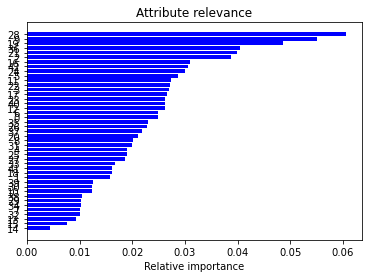

0 = 0.02485505620286439
1 = 0.015852622452432876
2 = 0.03867075281269264
3 = 0.027035520867079707
4 = 0.01905230210898429
5 = 0.028761616492323002
6 = 0.024874880793318985
7 = 0.010088855490560432
8 = 0.02017111592660826
9 = 0.054976644674990444
10 = 0.012277303767441098
11 = 0.02725639425555713
12 = 0.026124653343261275
13 = 0.009385212263327041
14 = 0.004467901650571631
15 = 0.007640877490551804
16 = 0.031036763722952315
17 = 0.02665050573731203
18 = 0.016201301737742268
19 = 0.04860346424889826
20 = 0.020988084463165597
21 = 0.039858870911977436
22 = 0.027208728073476112
23 = 0.026250817638810084
24 = 0.030066162878091305
25 = 0.018917940534164738
26 = 0.022843458755502748
27 = 0.01859124890115536
28 = 0.06052187306055195
29 = 0.010308142676820526
30 = 0.012432086361059696
31 = 0.01989399422049735
32 = 0.009992275685282437
33 = 0.016767783819964924
34 = 0.01019333762925549
35 = 0.02301494824144298
36 = 0.04043204245632067
37 = 0.021830322139869383
38 = 0.010480233696283354
39 = 0.01

In [15]:
# Through the created model we can see which attributes are the most significant to make a decision.
# The most relevant attributes will be the ones placed at the top of the tree.
features = list(X)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.title('Attribute relevance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative importance')
plt.show()

for name, importance in zip(X, model.feature_importances_):
    print(name, "=", importance)

# Attributes whose relevance is 0, will not be necessary to make the prediction of the target.